In [28]:
import cv2
import matplotlib as plt

from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import copy
%matplotlib notebook

## Task 1.1


Create a function that receives an array of image paths and returns an array of loaded images.
input:
- files, an array of paths
output:
- images, an array of images
signature:
images = read images(files)
HINT:
- use OpenCV to load each image


In [2]:
def read_images(images_paths):
    images_array = []
    for i in images_paths:
        img = cv2.imread(i)
        images_array.append(img)
        
    return np.asarray(images_array)

In [23]:
images_pathes = ["photos task2/under ci_1_task2_exp_1-320_F3,5.JPG",
                "photos task2/under ci_1_task2_exp_1-200_F3,5.JPG",
                "photos task2/reference ci_1_task2_exp_1-160_F3,5.JPG",
                "photos task2/over 2 ci_1_task2_exp_1-60_F3,5.JPG",
                "photos task2/over 1 ci_1_task2_exp_1-30_F3,5.JPG"]
        


def read_images(images_pathes):
    array_of_images = []
    for image_path in images_pathes:
        temp_img = cv2.imread(image_path)
        array_of_images.append(temp_img)
        
    return np.asarray(array_of_images)

images = read_images(images_pathes)
print(images.shape)
print(images[0])

(5, 3072, 4608, 3)
[[[ 31  37  36]
  [ 30  36  35]
  [ 30  36  35]
  ...
  [182 177 174]
  [182 177 174]
  [182 177 174]]

 [[ 32  38  37]
  [ 31  37  36]
  [ 31  37  36]
  ...
  [183 178 175]
  [183 178 175]
  [183 178 175]]

 [[ 32  38  37]
  [ 32  38  37]
  [ 31  37  36]
  ...
  [184 179 176]
  [183 178 175]
  [183 178 175]]

 ...

 [[ 11  11  11]
  [ 11  11  11]
  [ 10  10  10]
  ...
  [ 11  11  11]
  [ 10  10  10]
  [ 10  10  10]]

 [[ 12  12  12]
  [ 11  11  11]
  [ 11  11  11]
  ...
  [ 12  10  10]
  [ 12  10  10]
  [ 12  10  10]]

 [[ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]
  ...
  [ 11   9   9]
  [ 12  10  10]
  [ 13  11  11]]]


## Task 1.2
1.2 Print Images (0.5 pts)
Create a method to print multiple images in one jupyter cell as a matrix.
input:
- images, an array of images
- rows, number of rows in the matrix
- cols, number of columns in the matrix
signature:
print images(images, rows, cols)
HINT:
- revert from OpenCV BGR representation to RGB


<IPython.core.display.Javascript object>


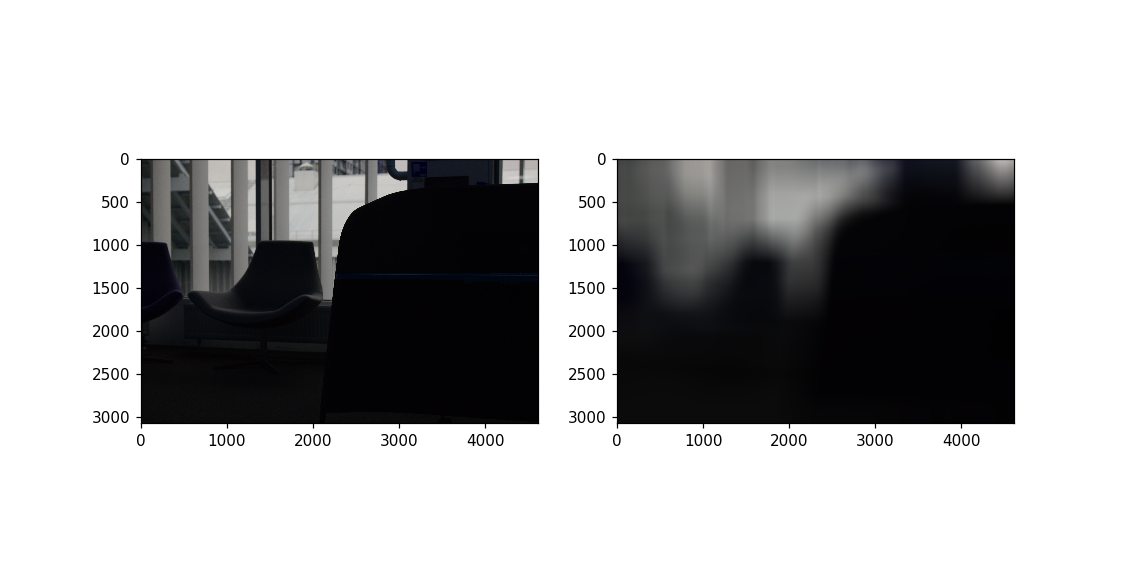

In [29]:
def print_images(images, rows, cols):

    fig, ax = plt.subplots(nrows=rows, ncols=cols)
    fig.set_figheight(rows * 4)
    fig.set_figwidth(cols * 4)
    
    for img, axes in zip(images, np.ravel(ax)):
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 4 else img
        axes.imshow(img, cmap="gray")
    plt.show()
    
orig = copy.deepcopy(images[0])
for i, image in enumerate(images):
    kernel = np.ones((500,500),np.float32)/250000
    dst = cv2.filter2D(image,-1,kernel)
    images[i] = dst
    break
print_images([orig, images[0]], 1, 2)

## 2.2 Grayscale (1 pt)
Write a function that takes an OpenCV image as input and returns a grayscale image. Build
your own function for that.
input:
- image: an OpenCV image
output:
- gray: 1 channel grayscale version of ’image’
signature:
gray = grayscale(image)
HINT:
- look up the brightness calculation recommended by the YIQ convention. The recommended factors that are believed to provide the optimal color contrast are: 299 for red, 587
for green, and 114 for blue.


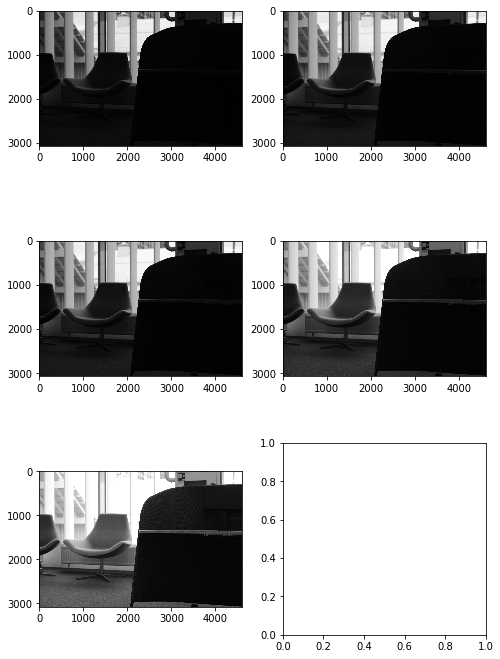

In [13]:
#2.2 
def grayscale(image):
    grayscaled = np.zeros((image.shape[0], image.shape[1]))
    #https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
    grayscaled = image[:,:,0]*0.2990 + image[:,:,1]*0.5870 + image[:,:,2]*0.1140
    return grayscaled


gray_images = np.asarray([grayscale(img) for img in images])

print_images(gray_images, 3, 2)

## 2.3 Histogram (3 pts)
Now you need to find some statistics of the exposure levels in each grayscale image (the
grayscale conversion was necessary to merge all the different image parts in one channel
correctly). The needed statistics are: median value, 20 and 80 percentile, mode, and average.
For data visualization, you will also generate a histogram plot.
--input:
- image: a grayscale image
- name: a string with name of image (to be used for labeling the histogram)
- show hist: a Boolean key for printing or not printing the histogram plot
output:
- average: average value of pixels in image
- mode: mode value of pixels in image
- median: median value of pixels in image
- twenty: twenty percentile value of pixels in image
- eighty: eighty percentile value of pixels in image
signature:
average, mode, median, twenty, eighty = histogram(image, name=””, show hist=False)
HINT:
- you need an ordered number of occurrences to create the histogram
- on the histogram plot draw vertical lines with different colors corresponding to each of
the calculated statistics
- in the histogram title write the name of the corresponding image and the values of
calculated statistics
IMPORTANT:
After debugging the function correctly, demonstrate its operation by calling it on all your
input images, with setting the ”show hist” flag value to True.

In [16]:
from scipy import stats


def histogram(image, name="name", show_hist=False):
    
    
    average = np.average(image)
    mode_value = stats.mode(image, axis = None)[0]
    median = np.median(image)
    
    
    twenty = np.percentile(image, 20)
    eighty = np.percentile(image, 80)
    
    if show_hist:
        values, counts = np.unique(image, return_counts=True)
        plt.bar(values, counts, label='Histogram', alpha=0.5)
        
        plt.plot(np.ones(len(values))*average, np.linspace(0, max(counts), len(values)) , label='average')
        plt.plot(np.ones(len(values))*median, np.linspace(0, max(counts), len(values)) , label='median')
        plt.plot(np.ones(len(values))*mode_value, np.linspace(0, max(counts), len(values)) , label='mode')
        plt.plot(np.ones(len(values))*twenty, np.linspace(0, max(counts), len(values)) , label='twenty')
        plt.plot(np.ones(len(values))*eighty, np.linspace(0, max(counts), len(values)) , label='eighty')
        plt.legend()
        plt.title(name, fontsize=14)
    
    return average, mode_value, median, twenty, eighty

results = list() # list of statistics result for each image
for path, gray_image in zip(images_pathes, gray_images):
    print("cuurent image", path)
    gray_image = cv2.resize(gray_image, (gray_image.shape[1]//2, gray_image.shape[0]//2))
    res = histogram(gray_image, show_hist=False)
    print(res)
    results.append(res)

cuurent image d:\Jupyter\Skoltech\CI\week 2\photos task2\under ci_1_task2_exp_1-320_F3,5.JPG
(32.56998428033905, array([1.527]), 6.625, 1.826, 54.619)
cuurent image d:\Jupyter\Skoltech\CI\week 2\photos task2\under ci_1_task2_exp_1-200_F3,5.JPG
(46.70154969102362, array([1.527]), 13.027000000000001, 2.7634999999999996, 98.869)
cuurent image d:\Jupyter\Skoltech\CI\week 2\photos task2\reference ci_1_task2_exp_1-160_F3,5.JPG
(50.66469516492781, array([3.598]), 15.559, 3.375, 109.68920000000111)
cuurent image d:\Jupyter\Skoltech\CI\week 2\photos task2\over 2 ci_1_task2_exp_1-60_F3,5.JPG
(69.07971499337086, array([255.]), 32.265, 5.598, 156.63599999999997)
cuurent image d:\Jupyter\Skoltech\CI\week 2\photos task2\over 1 ci_1_task2_exp_1-30_F3,5.JPG
(91.75362239300769, array([255.]), 64.84299999999999, 10.540999999999999, 198.159)


## 2.4 Threshold Bitmap (1 pt)
Generate a Black & White image with 0’s where the input pixels values are less than or equal
to the threshold, and 255’s where the pixels values are greater than the threshold.
input:
- image: grayscale image
- threshold: threshold value
output:
- thresh bitmap: 1 channel image with Black & White version of input image
signature:
thresh bitmap = threshold bitmap(image, threshold)


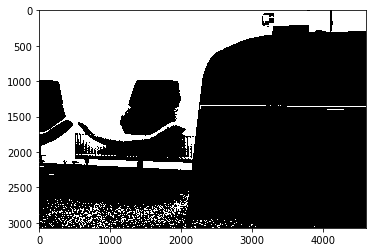

In [17]:
def threshold_bitmap(image, threshold):
    thresh_bitmap = np.zeros_like(image) # same size of image
    thresh_bitmap = 255*(image>threshold) # true - 255, false = 0
    return thresh_bitmap.astype(np.uint8)

plt.imshow(threshold_bitmap(gray_images[4], 100), cmap="gray")

## 2.5 Threshold Selection (1 pt)
Given your HDR dataset, choose which threshold values are the best ones for your set of
exposures and explain why. Describe how you found them, and speculate how you would
automate the process of the threshold search for any dataset.
Print all threshold bitmaps for all images. Show all threshold bitmaps together, being sorted
according to the values of their thresholds.


In [18]:
from skimage import measure

## Trying to apply each average value for each image respectively 

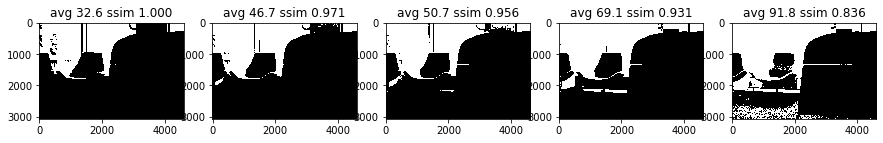

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_figheight(5)
fig.set_figwidth(15)
processed_img = list()
for i, (res, ax) in enumerate(zip(results, axes)):   
    temp_img = threshold_bitmap(gray_images[i], res[0])
    processed_img.append(temp_img)
    ssim = measure.compare_ssim(processed_img[0], processed_img[i], multichannel=True) 
    ax.imshow(temp_img, cmap="gray")
    avrg = "{:.1f}".format(res[0])
    ssim = "{:.3f}".format(ssim)
    ax.set_title("avg " + avrg + " ssim "  + ssim)
plt.show()




## Trying to apply each median value for each image respectively 

1.0
0.9534942888237296
0.9632934143118
0.9604217618873532
0.9599679974366698


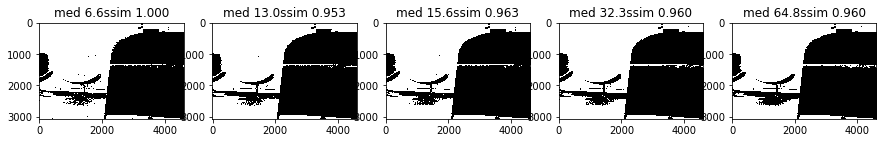

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_figheight(5)
fig.set_figwidth(15)
median_thr_bitmap = list()
for i, (res, ax) in enumerate(zip(results, axes)):   
    temp_img = threshold_bitmap(gray_images[i], res[2])
    median_thr_bitmap.append(temp_img)
    ssim = measure.compare_ssim(median_thr_bitmap[0], median_thr_bitmap[i], multichannel=True) 
    ax.imshow(temp_img, cmap="gray")
    avrg = "{:.1f}".format(res[2])
    print(ssim)
    ssim = "{:.3f}".format(ssim)
    ax.set_title("med " + avrg + "ssim "  + ssim)
plt.show()




## Trying to apply each percentil_80 value for each image respectively 

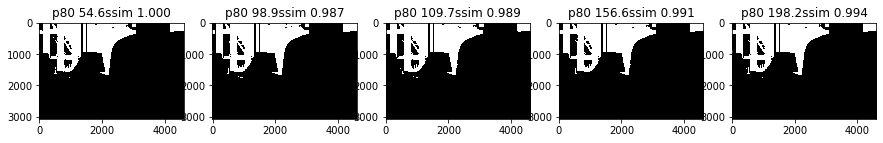

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_figheight(5)
fig.set_figwidth(15)
processed_img = list()
for i, (res, ax) in enumerate(zip(results, axes)):   
    temp_img = threshold_bitmap(gray_images[i], res[-1])
    processed_img.append(temp_img)
    ssim = measure.compare_ssim(processed_img[0], processed_img[i], multichannel=True) 
    ax.imshow(temp_img, cmap="gray")
    avrg = "{:.1f}".format(res[-1])
    ssim = "{:.3f}".format(ssim)
    ax.set_title("p80 " + avrg + "ssim "  + ssim)
plt.show()




So, according to structural similarity, percentil_80 show best result as median.

## 2.6 Exclusion Bitmap (1 pt)
Artefacts may appear in the image areas where the pixel values are close to the threshold.
You need to exclude these pixels from the final HDR image, based on the difference with an
exclusion bitmap. The exclusion bitmap consists of 0 wherever the grayscale value is within
±4 from the threshold value, and 255 elsewhere. Write this function.
input:
- image: grayscale image
- threshold: threshold value
output:
- excl bitmap: 1 channel image with Black & White exclusion map of image
signature:
excl bitmap = exclusion bitmap(image, threshold)


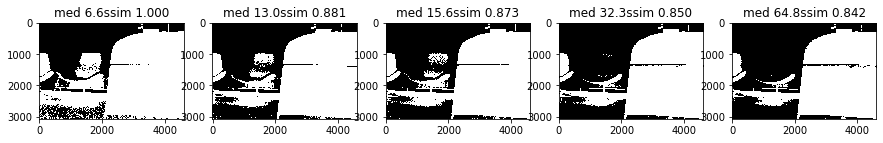

In [23]:
#2.6
def exclusion_bitmap(image, threshold):
    assert len(image.shape) !=3, 'Wrong colordepth'
    deviation = 4
    
    excl_bitmap = np.zeros_like(image)
    excl_bitmap = 255*((image < threshold-deviation) | (threshold+deviation > image))
    return excl_bitmap.astype(np.uint8)

fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_figheight(5)
fig.set_figwidth(15)
exclusion_bitmaps_images = list()
for i, (res, ax) in enumerate(zip(results, axes)):   
    temp_img = exclusion_bitmap(gray_images[i], res[2])
    exclusion_bitmaps_images.append(temp_img)
    ssim = measure.compare_ssim(exclusion_bitmaps_images[0], exclusion_bitmaps_images[i], multichannel=True) 
    ax.imshow(temp_img, cmap="gray")
    avrg = "{:.1f}".format(res[2])
    ssim = "{:.3f}".format(ssim)
    ax.set_title("med " + avrg + "ssim "  + ssim)
plt.show()




## 2.7 Shift Bitmap (1 pt)
Write a function to shift an image along the horizontal and the vertical axes. Fill the empty
space with black pixels.
input:
- image: color or grayscale image
- xs: shift along X axis
- ys: shift along Y axis
output:
- shifted bitmap: a copy of image shifted by xs and ys on the respective axis
signature:
shifted bitmap = shift bitmap(image, xs, ys)

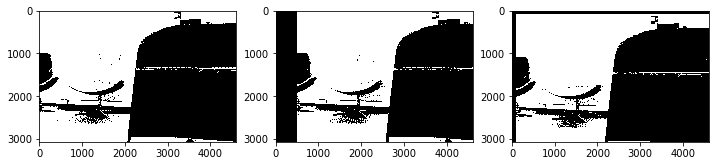

In [34]:
def shift_bitmap(image, xs, ys):
    image = np.roll(image, ys, axis=0)
    image = np.roll(image, xs, axis=1)
    if ys > 0:
        image[:ys, :] = 0
    elif ys < 0:
        image[ys:, :] = 0
    if xs > 0:
        image[:, :xs] = 0
    elif xs < 0:
        image[:, xs:] = 0
    return image
pictures = list()

pictures.append(shift_bitmap(median_thr_bitmap[0], 0, 0))
pictures.append(shift_bitmap(median_thr_bitmap[0], 500, 0))
pictures.append(shift_bitmap(median_thr_bitmap[0], 100, 100))
print_images(pictures, 1, 3)

## 2.8 XOR Bitmap (1 pts)
Write a function that calculates XOR of two images (with 255 instead of 1)
input:
- image1: 1 channel Black & White image
- image2: 1 channel Black & White image
output:
- xor bitmap: a 1 channel Black & White image with image1 XOR image2
signature:
xor bitmap = XOR bitmap(image1, image2)

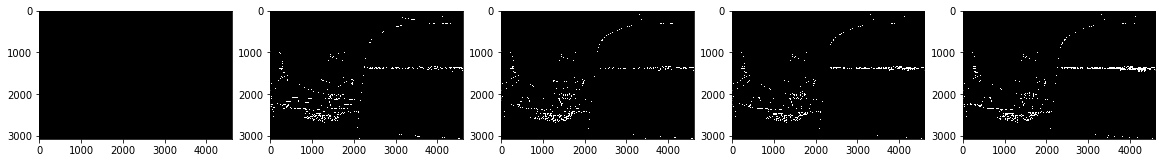

In [25]:
def XOR_bitmap(image1, image2):
    return (image1 != image2) * 255

xor_pictures = list()

for bitmap in median_thr_bitmap:
    xor_pictures.append(XOR_bitmap(median_thr_bitmap[0], bitmap))
    
print_images(xor_pictures, 1, 5)

## 2.9 AND Bitmap (1 pts)
Write a function that calculates AND of two images (with 255 instead of 1)
input:
- image1: 1 channel Black & White image
- image2: 1 channel Black & White image
output:
- and bitmap: a 1 channel Black & White image with image1 AND image2
signature:
and bitmap = AND bitmap(image1, image2)


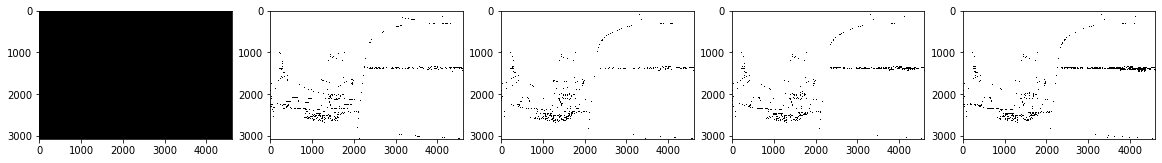

In [62]:
def AND_bitmap(image1, image2):
    return (image1 == image2) * 255

and_pictures = list()

for bitmap in median_thr_bitmap:
    and_pictures.append(AND_bitmap(median_thr_bitmap[0], bitmap))
    
print_images(and_pictures, 1, 5)

## 2.10 Overall MTB Algorithm (5 pts)
The function needs to take two images at different exposures as the input and then to
determine how much to move the second image with regard to the first one along the axes.

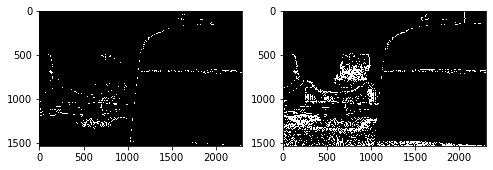

71295195


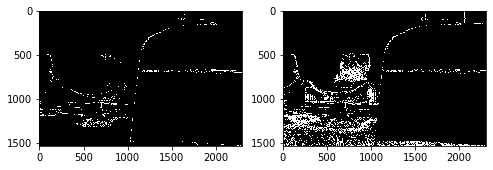

73463970


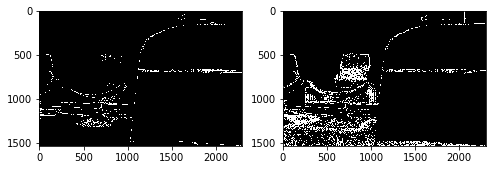

75836490


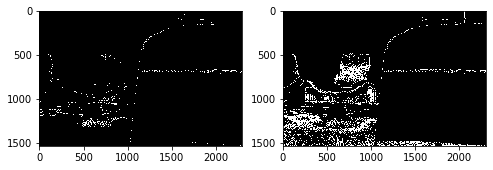

69939105


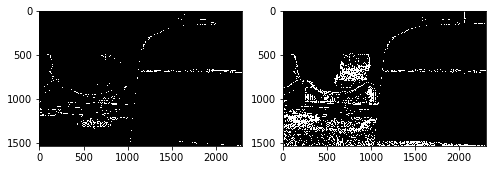

72355995


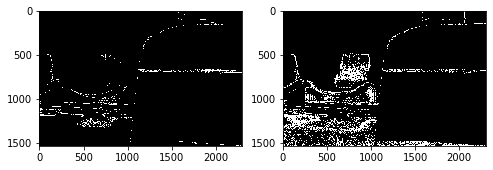

75015135


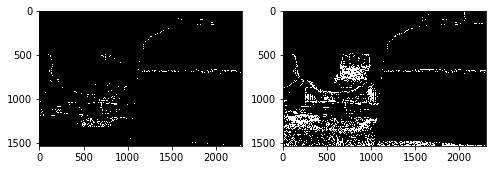

69273555


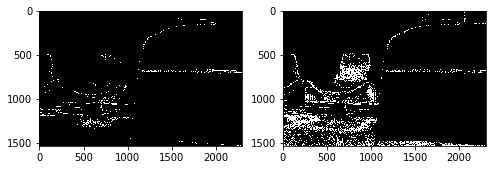

72097680


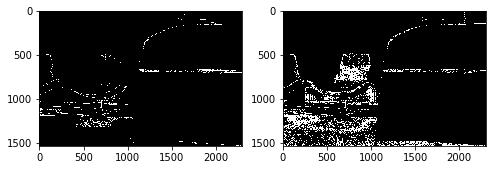

74998305
(1, -1)


In [119]:
import copy
def get_shift(image1, image2, max_shift, show = False):
    
    for i in range(max_shift):
        # resize
        image1 = cv2.resize(image1, (image1.shape[1]//2, image1.shape[0]//2))
        image2 = cv2.resize(image2, (image2.shape[1]//2, image2.shape[0]//2))
    
    #grayscale
    image1 = grayscale(image1)
    image2 = grayscale(image2)
    
    #statistics
    average_1, mode_value_1, median_1, p_20_1, p_80_1 = histogram(image1, name = "historgam", show_hist = False)
    average_2, mode_value_2, median_2, p_20_2, p_80_2 = histogram(image2, name = "historgam", show_hist = False)
    
    thresh_bitmap_1 = threshold_bitmap(image1, median_1)
    thresh_bitmap_2 = threshold_bitmap(image2, median_2)

    xclusion_bitmap_1 = exclusion_bitmap(image1, median_1)
    xclusion_bitmap_2 = exclusion_bitmap(image2, median_2)
    
    
    shifts =  [-1, 0, 1]
    final_xs = np.nan
    final_ys = np.nan
    reference_error = 1e10
    for xs in shifts:
        for ys in shifts:
            shift_thr_bit_2 = shift_bitmap(thresh_bitmap_2.copy(), xs=xs, ys=ys)
            shift_xcl_bit_2 = shift_bitmap(xclusion_bitmap_2.copy(), xs=xs, ys=ys)
            
            xor_bitmap = XOR_bitmap(thresh_bitmap_1, shift_thr_bit_2)
            and_bitmap = AND_bitmap(shift_xcl_bit_2, xor_bitmap)
            and_bitmap = AND_bitmap(and_bitmap, xclusion_bitmap_1)
            error = and_bitmap.sum()
            if show:
                print_images([xor_bitmap, and_bitmap], 1, 2)
                print(error)
            if error < reference_error:
                final_xs = xs
                final_ys = ys
                reference_error = error
    return final_xs * max_shift, final_ys * max_shift
final_shift = get_shift(images[0], images[1], 1, show=True)
print(final_shift)

## 2.11 Aligning images (1 pts)
Take one of your images as a reference and align all the others, show that the displacements
between the reference and the aligned images are removed.


In [123]:

for i, image in enumerate(images):
    final_shift = get_shift(images[0], image, 1, show=False)
    print("Shift between image 0" + " and image " + str(i) + " " +  str(final_shift))

Shift between image 0 and image 0 (0, 0)
Shift between image 0 and image 1 (1, -1)
Shift between image 0 and image 2 (-1, 0)
Shift between image 0 and image 3 (0, -1)
Shift between image 0 and image 4 (0, -1)


### 2.12 Recover the Camera Response Function (1 pts)
When we photograph a scene and digitize the photograph, the resulting 2D array of brightness values is not the true measurement of the radiance pattern in the scene. The Camera
Response Function (CRF) determines the calibration curve for each color channel that compensates for the distortion.
Estimation of CRF is needed to merge the images correctly into one HDR photograph.
Luckily the CRF can be estimated from the images if we know the exposure times for
each image3
. Finding the CRF is performed using just two lines of code in OpenCV.
Obtain Camera Response Function (CRF) using OpenCV

In [106]:
# Obtain Camera Response Function (CRF)
exposure_times = np.array([1/320, 1/200, 1/160, 1/60, 1/30], dtype=np.float32)
images_ = [images[0], images[1], images[2], images[3], images[4]]
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images_, exposure_times)

### 2.13 Merge Images (1 pts) by OpenCV
Merge the aligned images at different exposures into one HDR image using OpenCV, print
the result in the notebook, and save it as a file.

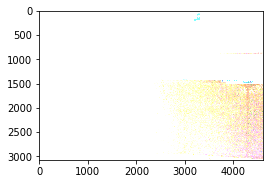

(3072, 4608, 3)

In [108]:
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images_, exposure_times, responseDebevec)
# Save HDR image.
cv2.imwrite("hdr_image_byopencv.hdr", hdrDebevec)
img_HDR = cv2.imread("hdr_image_byopencv.hdr")
print_images([img_HDR], 1, 1)
img_HDR.shape

### 2.14 Tone mapping (1 pts)
After the merging, the new image uses a wider range of values for representing each channel,
instead of the 8 bits it now has the bitdepth of n×8, where n is the number of exposures used
for merging. The minimum value used to represent the pitch black condition is obviously
0, and the theoretical maximum value is 232, way larger than the usual 255. We need to
shrink everything back to the 24 bits representation (for 3 channels), which is normally used
to store images. ”Tone mapping” is the process that helps reduce the range, while retaining
the local contrast in the HDR image.
Tone-map the merged HDR image to obtain a 24-bit color image using one of the functions
offered by OpenCV, print it in the notebook, and save it as a file.
Do you see the recovered image details in the shady/bright areas?

(3072, 4608, 3)

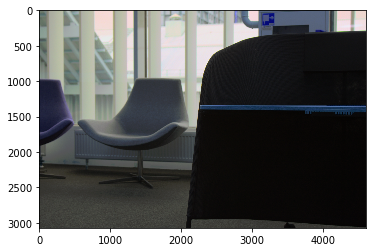

In [114]:
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 1 * ldrDrago
cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)
img_HDR = cv2.imread("ldr-Drago.jpg")
plt.imshow(ldrDrago)
img_HDR.shape

P.S. If I open image from windows explorer, blue tone will dissapear